In [1]:
#dnn
import tensorflow as tf
dnn= tf.keras.models.load_model('dnn_model.h5')
print(dnn)

In [2]:
#linear regression
import joblib
lr= joblib.load('lr.pkl')
print(lr)

LinearRegression()


In [3]:
#decision trees
import joblib
dt4= joblib.load('dtdepth4.pkl')
print(dt4)

DecisionTreeRegressor(max_depth=4)


In [4]:
#svm
import joblib
svm= joblib.load('svm.pkl')
print(svm)

SVR()


# Graph Comparison

### Data

In [5]:
import numpy as np
import pandas as pd
train_df = pd.read_excel('alldatapoints2.xlsx')
x=  train_df.drop(columns=['AVGBPT'])
y = train_df[['AVGBPT']]
x=np.array(x)
y=np.array(y)


actualdf=pd.read_excel('actualvalue.xlsx',header=None)
value=actualdf
actualtemp=list(value.iloc[:,5])


### Fitting the scaler

In [6]:
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(trainx)
X_test_scaled = scaler.transform(testx)

# Exporting the fitted Scalar

In [7]:
from joblib import dump

# Export the scaler to a file
dump(scaler, 'fitted_scaler.joblib')

['fitted_scaler.joblib']

1/1 [==============================] - 0s 67ms/step


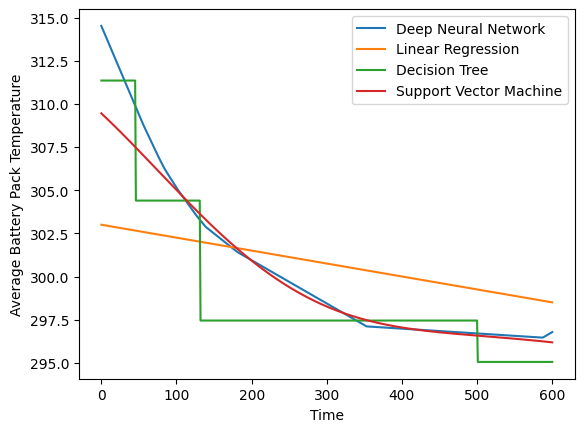

In [8]:
# graph plotter from t=0 to Temp=600

time=[i for i in range(601)]
dnnvals=[]
lrvals=[]
dt4vals=[]
svmvals=[]
for i in range(601):
    temparray=np.array([[21, 0.15,42400, 45,i]])
    dnnval=dnn.predict(scaler.transform(temparray))
    lrval=lr.predict(scaler.transform(temparray))
    dt4val=dt4.predict(scaler.transform(temparray))
    svmval=svm.predict(scaler.transform(temparray))
    dnnvals.append(dnnval[0][0])
    lrvals.append(lrval[0][0])
    dt4vals.append(dt4val[0])
    svmvals.append(svmval[0])
    
    
  
# plot of train and test scores vs tree depth
pyplot.plot(time, dnnvals, '-', label='Deep Neural Network')
pyplot.plot(time, lrvals, '-', label='Linear Regression')
pyplot.plot(time, dt4vals, '-', label='Decision Tree')
pyplot.plot(time, svmvals, '-', label='Support Vector Machine')
pyplot.xlabel('Time')
pyplot.ylabel('Average Battery Pack Temperature')
pyplot.legend()
pyplot.show()



# Plot with actual

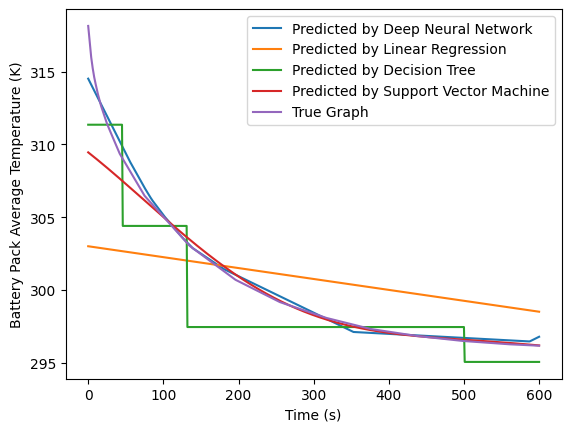

In [9]:
# plot of train and test scores vs tree depth
pyplot.plot(time, dnnvals, '-', label='Predicted by Deep Neural Network')
pyplot.plot(time, lrvals, '-', label='Predicted by Linear Regression')
pyplot.plot(time, dt4vals, '-', label='Predicted by Decision Tree')
pyplot.plot(time, svmvals, '-', label='Predicted by Support Vector Machine')
pyplot.plot(time, actualtemp,'-',label='True Graph')
pyplot.xlabel('Time (s)')
pyplot.ylabel('Battery Pack Average Temperature (K)')
pyplot.legend()
pyplot.savefig('All Models.png',dpi=300)
pyplot.show()




In [10]:
import time as time
dnn= tf.keras.models.load_model('dnn_model.h5')
start=time.time()
dnnvals=[]
for i in range(601):
    temparray=np.array([[21, 0.15,42400, 45,i]])
    dnnval=dnn.predict(scaler.transform(temparray))   
    dnnvals.append(dnnval)

end=time.time()


1/1 [==============================] - 0s 33ms/step


In [13]:
print('Total time for the simulation [21, 0.15, 42400, 45]: %d seconds.' %(end-start) )

Total time for the simulation [21, 0.15, 42400, 45]: 72 seconds.


In [14]:
from sklearn.metrics import mean_squared_error,accuracy_score
actualvalues=actualtemp
predictedvalues=[i[0][0] for i in dnnvals]
print(actualvalues)
print(predictedvalues)
print('MSE in the Predicted Values: %.3f ' %(mean_squared_error(actualvalues,predictedvalues)) )

[318.1443, 317.5998, 317.0172, 316.4704, 315.9875, 315.597, 315.2363, 314.9159, 314.6189, 314.3577, 314.1262, 313.8947, 313.6631, 313.445, 313.2489, 313.0528, 312.8568, 312.6691, 312.5137, 312.3583, 312.2029, 312.0475, 311.892, 311.7366, 311.5812, 311.4258, 311.2997, 311.178, 311.0564, 310.9348, 310.8131, 310.6915, 310.5698, 310.4482, 310.3266, 310.2049, 310.0833, 309.9616, 309.84, 309.7184, 309.5967, 309.4751, 309.36, 309.2726, 309.1852, 309.0978, 309.0105, 308.9231, 308.8357, 308.7483, 308.661, 308.5736, 308.4862, 308.3988, 308.3114, 308.2241, 308.1367, 308.0493, 307.9619, 307.8746, 307.7872, 307.6998, 307.6124, 307.5251, 307.4377, 307.3503, 307.2629, 307.1755, 307.0882, 307.0008, 306.9134, 306.826, 306.7387, 306.6513, 306.5639, 306.4765, 306.4142, 306.357, 306.2997, 306.2424, 306.1851, 306.1278, 306.0705, 306.0132, 305.956, 305.8987, 305.8414, 305.7841, 305.7268, 305.6695, 305.6122, 305.555, 305.4977, 305.4404, 305.3831, 305.3258, 305.2685, 305.2112, 305.1539, 305.0967, 305.0394, 30

# Inverse optimization

# Nomenclature

In [15]:
'''
x1=Coolant Inlet Temp (Unknown)
x2=Coolant Inlet Vel (known)
x3=Heat Generated Per Unit Volume (known)
x4=Battery Pack Initial Temp (known)
x5=Time at which Average Battery Pack Temperature is desired (known)
fixedvalues=[x1,x2,x3,x4], remove x1/x2 when predicting x1/x2
'''

'\nx1=Coolant Inlet Temp (Unknown)\nx2=Coolant Inlet Vel (known)\nx3=Heat Generated Per Unit Volume (known)\nx4=Battery Pack Initial Temp (known)\nx5=Time at which Average Battery Pack Temperature is desired (known)\nfixedvalues=[x1,x2,x3,x4], remove x1/x2 when predicting x1/x2\n'

In [18]:
import tensorflow as tf
import joblib
mlmodel= tf.keras.models.load_model('dnn_model.h5')
modelscaler= joblib.load('fitted_scaler.joblib')# Define the scaler
yneeded=298.6236 #Desired Average Thermal Battery Pack Temperature 

# #Limits for x1 Coolant Inlet Temp
# to_predict='x1'
# fixedvalues=[0.25,42400,5,437]
# lowlimit=19
# highlimit=26
# convergence_threshold=0.1


##Limits for x2 Coolant Inlet Vel
to_predict='x2'
fixedvalues=[25,19452,25,100]
lowlimit=0.1
highlimit=0.75
convergence_threshold=0.1

# GA

In [19]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# Define the fitness function (minimization)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Define the individual with its attributes (x1, x2, x3, x4, x5)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the toolbox
toolbox = base.Toolbox()

# Register attributes
toolbox.register("attr_float", random.uniform, lowlimit, highlimit)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


best_fitness_history = []  # Track best fitness values across generations
no_improvement_count = 0  # Count consecutive generations without improvement
max_no_improvement=20


# Define the objective function
def objective_function(allrandomgenerated,desired_y,fixedvalueslist,mlmodel,to_predict,scaler):
    
    if to_predict=='x1':#Coolant Temperature
        firstrandomlist=[allrandomgenerated[0]]
        x=np.array([firstrandomlist+fixedvalueslist])

    
    elif to_predict=='x2':#Coolant Velocity
        firstrandomlist=[allrandomgenerated[1]]
        x=np.array([[fixedvalueslist[0]]+firstrandomlist+fixedvalueslist[1:]])
   
    xscaled=scaler.transform(x)     
    predicted_y = mlmodel.predict(xscaled)  # Use the trained model to predict y
    print(x,predicted_y)
    return abs(predicted_y[0][0] - desired_y)
    

# Register the objective function as the evaluation function
toolbox.register("evaluate", objective_function, desired_y=yneeded,fixedvalueslist=fixedvalues,mlmodel=mlmodel,
                 to_predict=to_predict,scaler=modelscaler)

# Register genetic operators
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the GA parameters
population_size = 50
num_generations = 100

# Initialize population
population = toolbox.population(n=population_size)

# Evaluate the entire population
fitnesses = [toolbox.evaluate(individual) for individual in population]


for individual, fitness in zip(population, fitnesses):
    individual.fitness.values = (fitness,)

# Run the GA
convergence_threshold = convergence_threshold
for generation in range(num_generations):
    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))
    # Clone the selected individuals
    offspring = [toolbox.clone(ind) for ind in offspring]

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with invalid fitness
    invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(ind) for ind in invalid_individuals]
    for individual, fitness in zip(invalid_individuals, fitnesses):
        individual.fitness.values = (fitness,)
        

    # Replace the population by the offspring
    population[:] = offspring
    
    #Check for convergence:

    best_fitness = min([ind.fitness.values[0] for ind in population])
    if best_fitness <= convergence_threshold:
        print("Converged!")
        break  # Terminate the loop if convergence criterion is met
    
    print("Generation:", generation)  # Print the current generation number
    
    # Check if the error is reducing
    if len(best_fitness_history) > 1 and best_fitness >= best_fitness_history[-2]:
        no_improvement_count += 1
    else:
        no_improvement_count = 0
    
    if no_improvement_count >= max_no_improvement:
        print("Error is not reducing. Convergence not achieved.")
        break
    
    

# Get the best individual

best_individual = tools.selBest(population, k=1)[0]

if to_predict=='x1':  
    optimized_val = best_individual[0]
    print("Optimized x1(Coolant Inlet Temperature):", optimized_val,'Degree Celcius')
    print("Optimized Parameters:",[optimized_val]+fixedvalues)
    print("Battery Pack Average Temperature:",mlmodel.predict(scaler.transform([[optimized_val]+fixedvalues]))[0][0],'K') 
elif to_predict=='x2':
    
    
    optimized_val = best_individual[1]
    print("Optimized x2(Coolant Inlet Velocity):", optimized_val, 'm/sec')
    print("Optimized Parameters:",[fixedvalues[0]]+[optimized_val]+fixedvalues[1:])
    print("Battery Pack Average Temperature:",
          mlmodel.predict(scaler.transform([[fixedvalues[0]]+[optimized_val]+fixedvalues[1:]]))[0][0],'K') 
    


1/1 [==============================] - 0s 61ms/step
[[2.50000000e+01 2.41143285e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [[295.432]]
1/1 [==============================] - 0s 27ms/step
[[2.50000000e+01 6.49679248e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [[534.6506]]
1/1 [==============================] - 0s 20ms/step
[[2.50000000e+01 2.15179551e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [[297.32803]]
1/1 [==============================] - 0s 21ms/step
[[2.50000000e+01 5.19933795e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [[439.7273]]
1/1 [==============================] - 0s 23ms/step
[[2.50000000e+01 2.80933326e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [[295.87903]]
1/1 [==============================] - 0s 39ms/step
[[2.500000e+01 2.837063e-01 1.945200e+04 2.500000e+01 1.000000e+02]] [[296.18268]]
1/1 [==============================] - 0s 24ms/step
[[2.50000000e+01 6.59233532e-01 1.94520000e+04 2.50000000e+01
  1.00000000e+02]] [

In [46]:
mlmodel.predict(modelscaler.transform(np.array([[21, 0.31 ,42400, 45, 600]])))

1/1 [==============================] - 0s 40ms/step


array([[300.20212]], dtype=float32)